In [27]:
# importing pandas and numpy libraries to import datset and creat data frames and pivot tables
import pandas as pd
import numpy as np

In [28]:
##Importing datset from google drive with downloadble link.
file_path="https://drive.google.com/uc?export=download&id=1Igfusg_uVIzIXWJ1OlR62uYn2I1h2PsA"
## Creating dataframe for the cooling tower.
df=pd.read_csv(file_path)

In [29]:
# Name of the datset is df.
df.tail(2)

,NYC_Cooling_Tower_ID,BIN,Address,Borough,Postcode,Intended_Use,Make,Model,Serial_Number,Cooling_Capacity,...,Date_Commissioned,Latitude,Longitude,Community Board,Council District,Census Tract,BBL,NTA,Deleted,Location 1
6239,1000022480,1003933,245 GRAND ST,MANHATTAN,10002,AIR CONDITIONING,MARLEY,NaN,na,10,...,12/01/2014,40.718286,-73.994322,3.0,1.0,16,1.003040e+09,Chinatown ...,No,"(40.718286, -73.994322)"
6240,1000022500,3029667,188 EASTERN PARKWAY,BROOKLYN,11238,BASE BUILDING HVAC,BALTIMORE AIRCOIL COMPANY (BAC),NOT VISIBLE,Not visible,"1,000",...,12/01/2017,40.670553,-73.963757,55.0,35.0,177,3.011830e+09,park-cemetery-etc-Brooklyn ...,No,"(40.670553, -73.963757)"


In [30]:
## Checking length of data set
print("The length of dataset is",len(df),".")

The length of dataset is 6241 .


In [31]:
## Dropping the rows withg missing and NaN values.
dff=df.dropna()

In [32]:
## New datset with dropped values
dff.tail(2)

,NYC_Cooling_Tower_ID,BIN,Address,Borough,Postcode,Intended_Use,Make,Model,Serial_Number,Cooling_Capacity,...,Date_Commissioned,Latitude,Longitude,Community Board,Council District,Census Tract,BBL,NTA,Deleted,Location 1
6237,1000023515,1002402,52 MOTT ST,MANHATTAN,10013,AIR CONDITIONING,MARLEY,492B,240238,66,...,06/01/2012,40.715799,-73.998373,3.0,1.0,29,1.002010e+09,Chinatown ...,No,"(40.715799, -73.998373)"
6240,1000022500,3029667,188 EASTERN PARKWAY,BROOKLYN,11238,BASE BUILDING HVAC,BALTIMORE AIRCOIL COMPANY (BAC),NOT VISIBLE,Not visible,"1,000",...,12/01/2017,40.670553,-73.963757,55.0,35.0,177,3.011830e+09,park-cemetery-etc-Brooklyn ...,No,"(40.670553, -73.963757)"


In [33]:
## Checking the length of datset after dropping missing value's rows.
len(dff)

1446

Note:

The above dropping conclude that most of the values in the data set were missing which is very serious concern. Proper record is necessay for all the cooling tower, because it is related to DOHMH and public health. We have to process our furthur exploration with the new datset with length 1446.

In [34]:
## Finding the intended use of cooling tower in NYC.
dff["Intended_Use"].unique()

array(['BASE BUILDING HVAC', 'AIR CONDITIONING', 'CONDENSATE WATER',
       'REFRIGERATION'], dtype=object)

Q.N 1 (Answer)

From the data set we find that the cooling towers are use for: 

1.Air Conditining

2.Base Building HVAC

3.Condensate water

4.Refrigration.


Q.N 2

The makes of the cooling tower machines are displayed using pivot table with their counts for the reduced datas set.

In [35]:
#CReating pivot table for count of differnet Make of tower.
Make=dff.pivot_table(values="NYC_Cooling_Tower_ID", index="Make", aggfunc="count")
Make.head(2)

,NYC_Cooling_Tower_ID
Make,
AAON,2
AMCOT,2


In [36]:
## Creating pivot table for Cooling capacity units count.
ccu=dff.pivot_table(values="NYC_Cooling_Tower_ID", index="Cooling_Capacity_Units", aggfunc="count")

In [37]:
ccu

,NYC_Cooling_Tower_ID
Cooling_Capacity_Units,
BTU/HR,232
CFM,40
REFRIGERATION TONS,1174


Q.N 3 (Answer)

The different units of cooling capacity used are:
1. BTU/HR
2. CFM
3. REFRIGERATION TONS

Q.N 4
Plotting the different Make used in cooling tower using the bar chart with their counts.

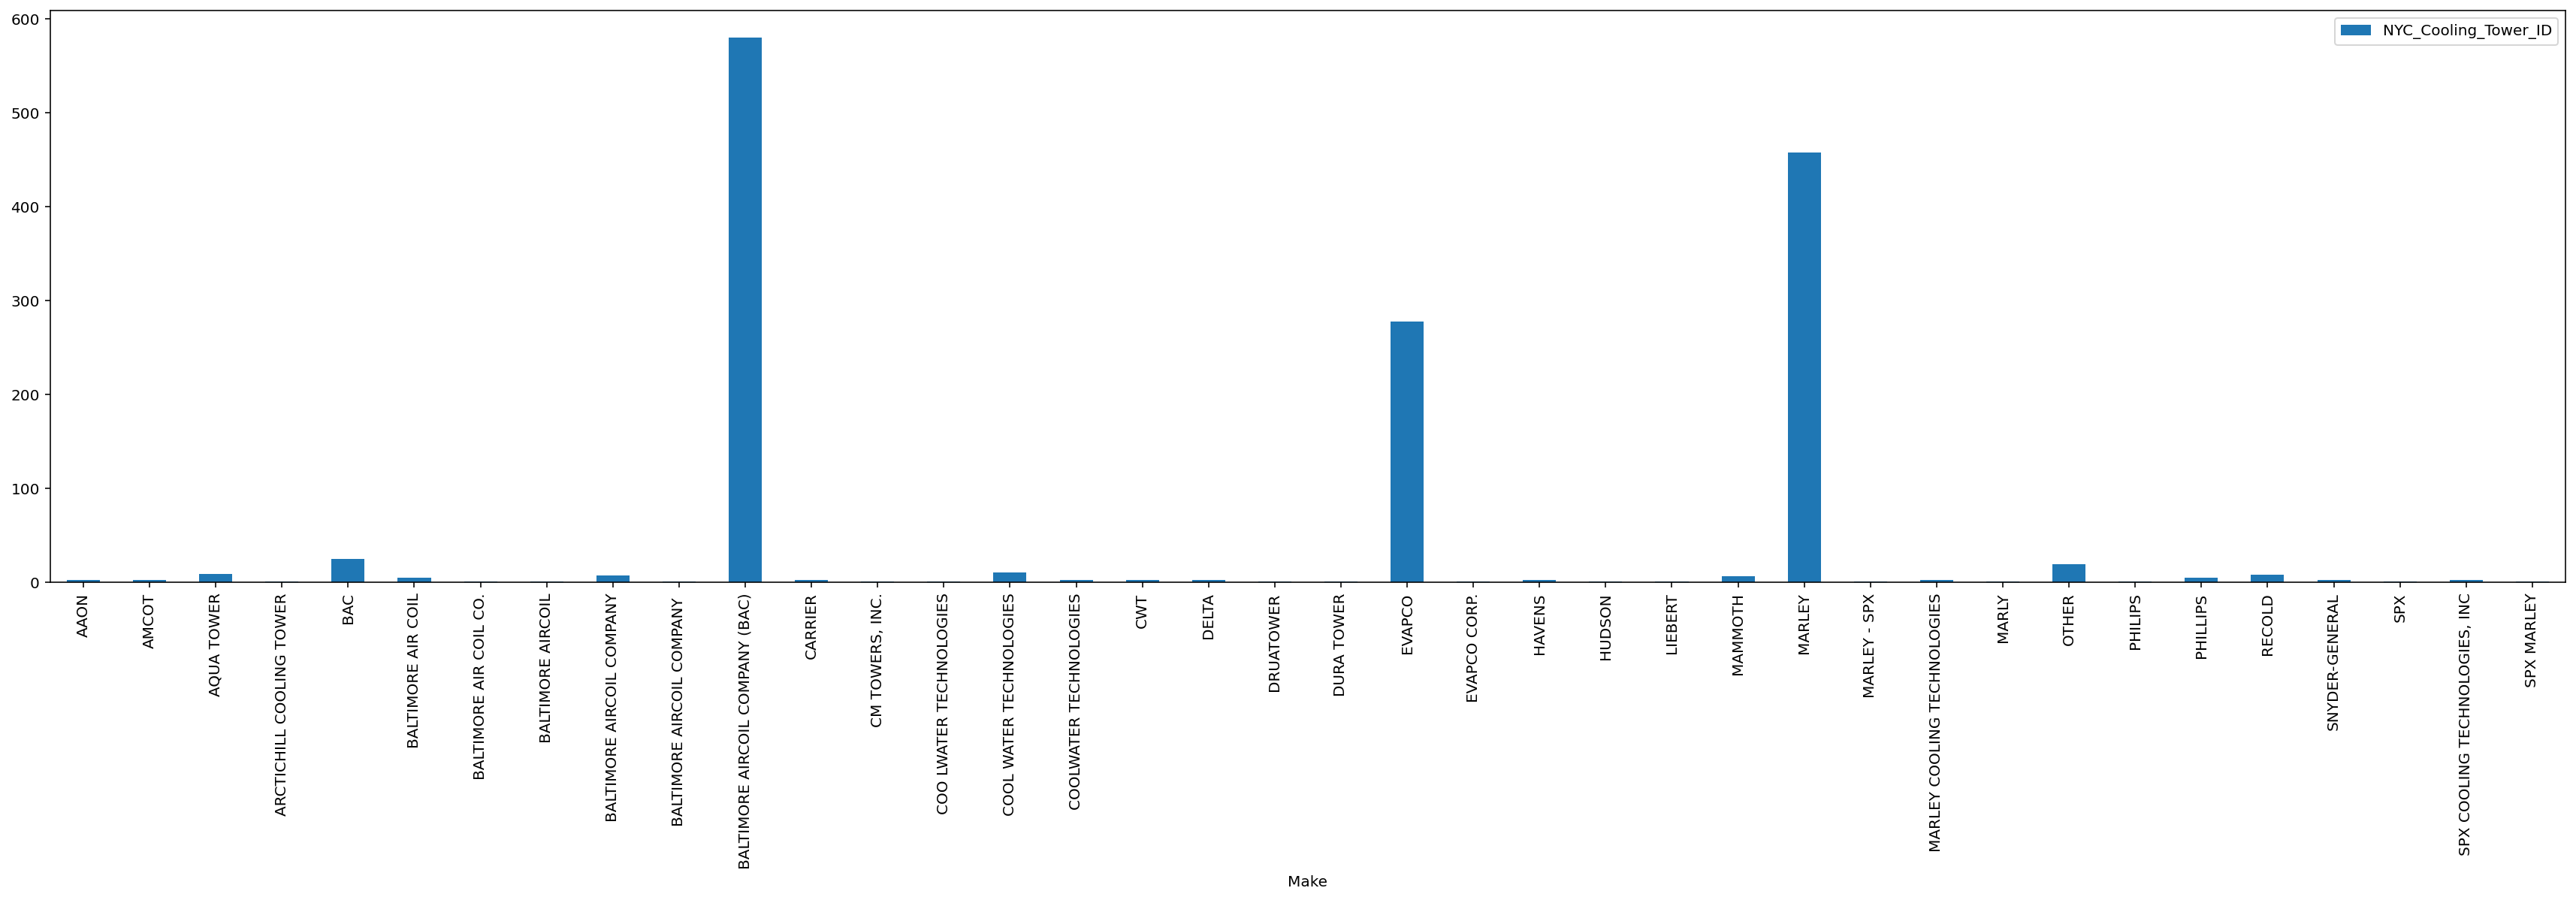

In [38]:

Make.plot.bar(figsize=(30,7))

Q.N 5
Draw bar chart and pie chart using intended use of cooling machine.

In [39]:
##Creating data frame for intended use count using ID.
Use=df.pivot_table(values="NYC_Cooling_Tower_ID", index="Intended_Use",aggfunc="count")
Use

,NYC_Cooling_Tower_ID
Intended_Use,
AIR CONDITIONING,1436
BASE BUILDING HVAC,310
CONDENSATE WATER,171
REFRIGERATION,332


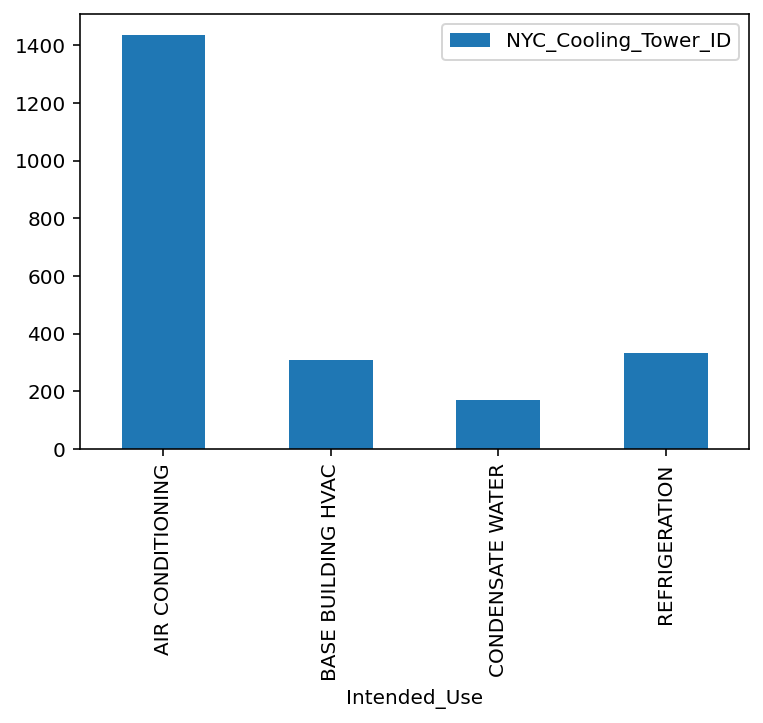

In [40]:
#Plotting bar chart for intended use count for total machines.
Use.plot.bar()

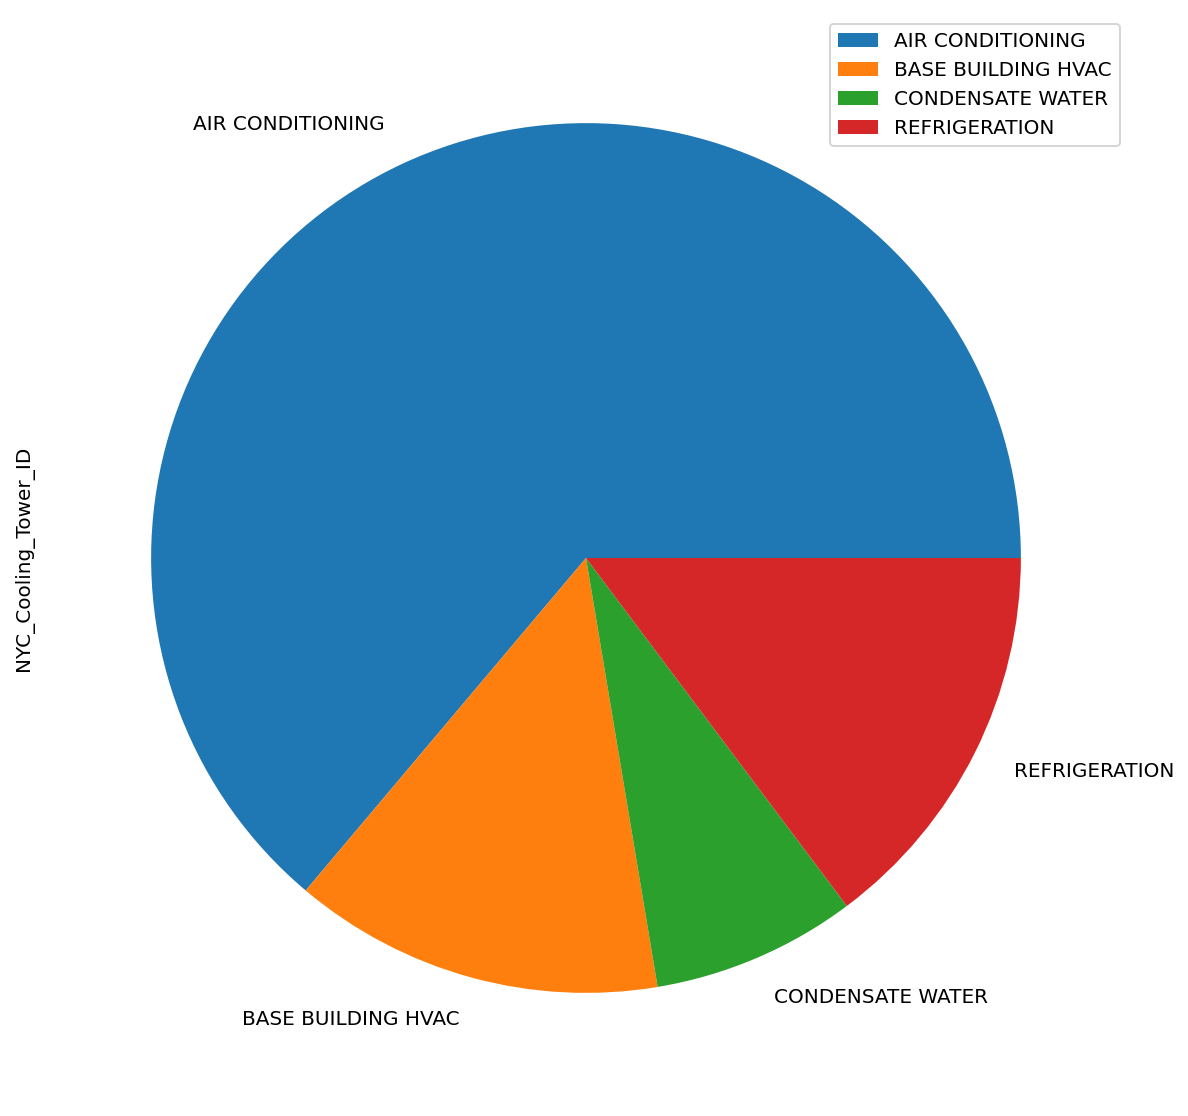

In [41]:
#Plotting pie chart for intended use count for total machines.
Use.plot(kind="pie",y="NYC_Cooling_Tower_ID",figsize=(10,10))

Q.N 6
plotting map of NYC with original and reduced data set to see the difference

In [42]:
## importing the required libraries to plot map an scattor plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%config InlineBackend.figure_format = 'retina'

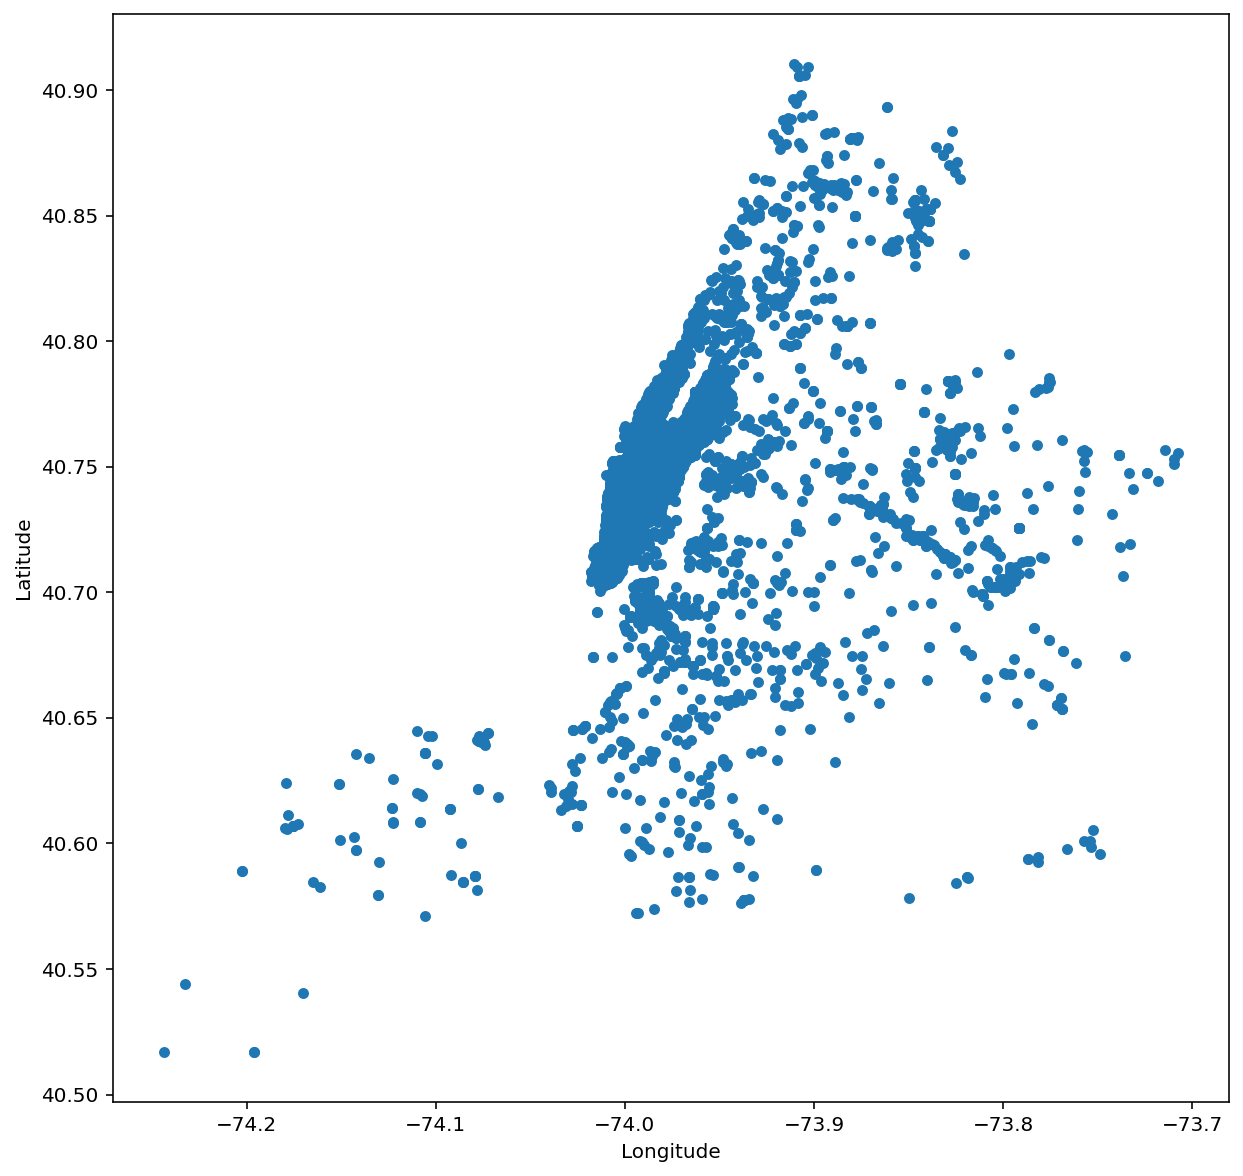

In [43]:
# Original dataset
df.plot(figsize=(10, 10),kind="scatter",y="Latitude", x="Longitude")
plt.show()

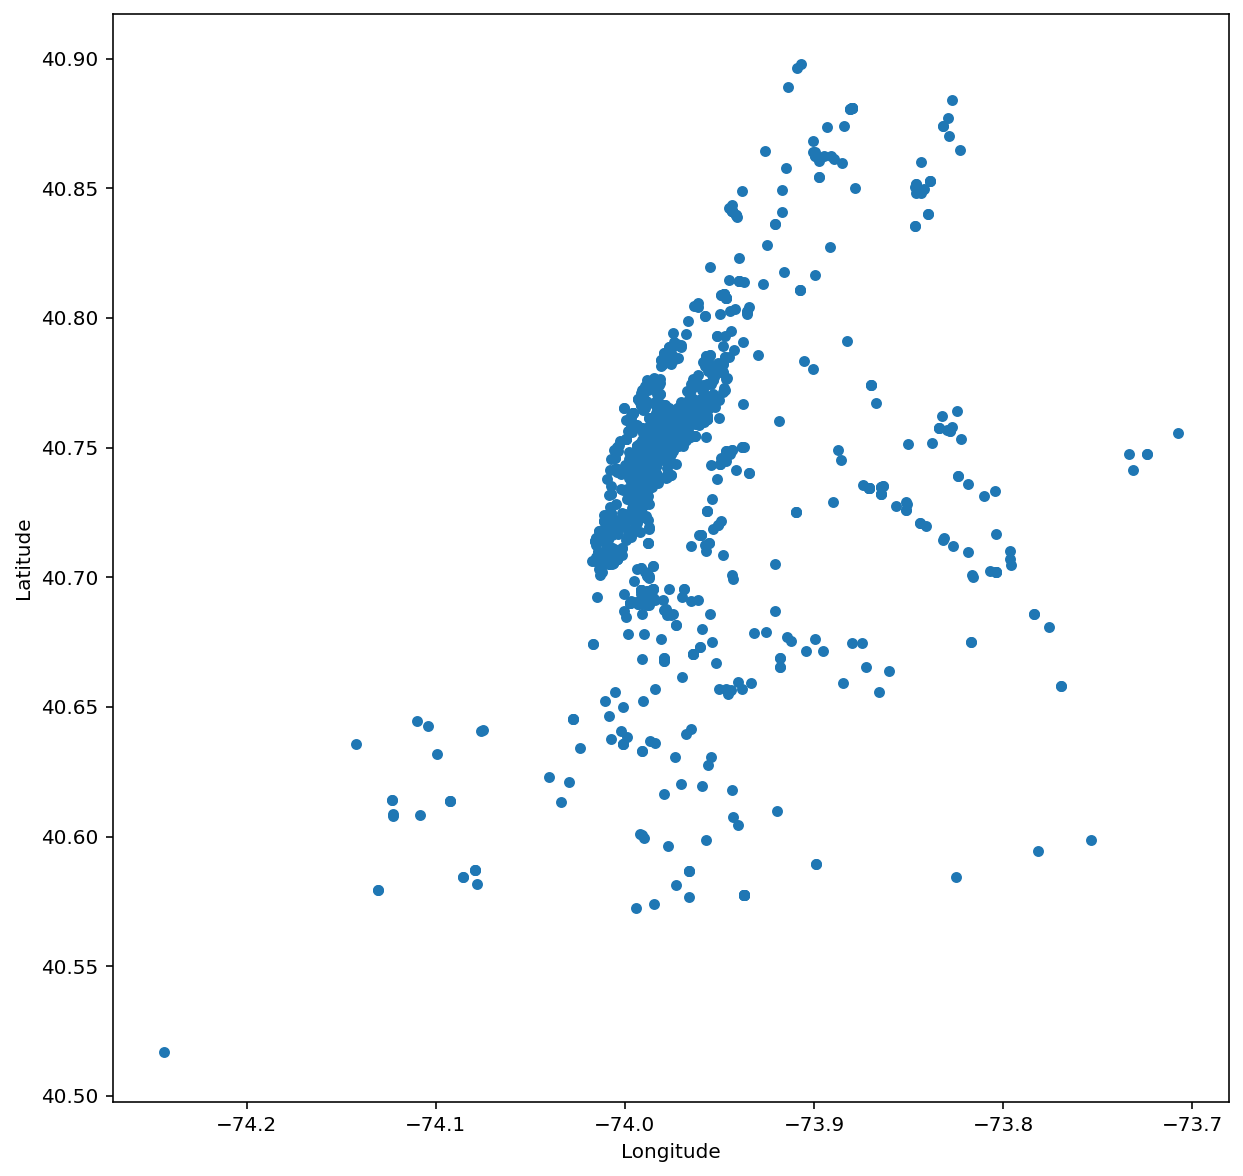

In [44]:
## reduced data set
dff.plot(figsize=(10, 10),kind="scatter",y="Latitude", x="Longitude")
plt.show()

note:

The original dataset has the dense scattor dots whereas reduced data set is very light, we can conclude that missing values cause data to loose many of the important information of different locations.

In [45]:
##Printing the data frame.
dff.head(2)

,NYC_Cooling_Tower_ID,BIN,Address,Borough,Postcode,Intended_Use,Make,Model,Serial_Number,Cooling_Capacity,...,Date_Commissioned,Latitude,Longitude,Community Board,Council District,Census Tract,BBL,NTA,Deleted,Location 1
11,1000001242,1038577,919 THIRD AVE,MANHATTAN,10022,BASE BUILDING HVAC,MARLEY,760,Main_System,"5,400",...,01/01/1969,40.758963,-73.967589,6.0,4.0,108,1.013290e+09,Turtle Bay-East Midtown ...,No,"(40.758963, -73.967589)"
14,1000000777,3397430,2601 OCEAN PARKWAY,BROOKLYN,11235,AIR CONDITIONING,MARLEY,4821,71896-1/B22148A/4821,"240,000",...,08/04/2016,40.586652,-73.966168,13.0,48.0,370,3.072390e+09,Brighton Beach ...,No,"(40.586652, -73.966168)"


Q.N 7

creating pivot table for borough and number of cooling towers and counting value using bar graph.

In [46]:
##Creating pivot table to count number of cooling towers in each borough and plotting graph.
borough=dff.pivot_table(values="NYC_Cooling_Tower_ID",index="Borough", aggfunc="count")
borough

,NYC_Cooling_Tower_ID
Borough,
BRONX,63
BROOKLYN,198
MANHATTAN,1058
QUEENS,104
STATEN ISLAND,23


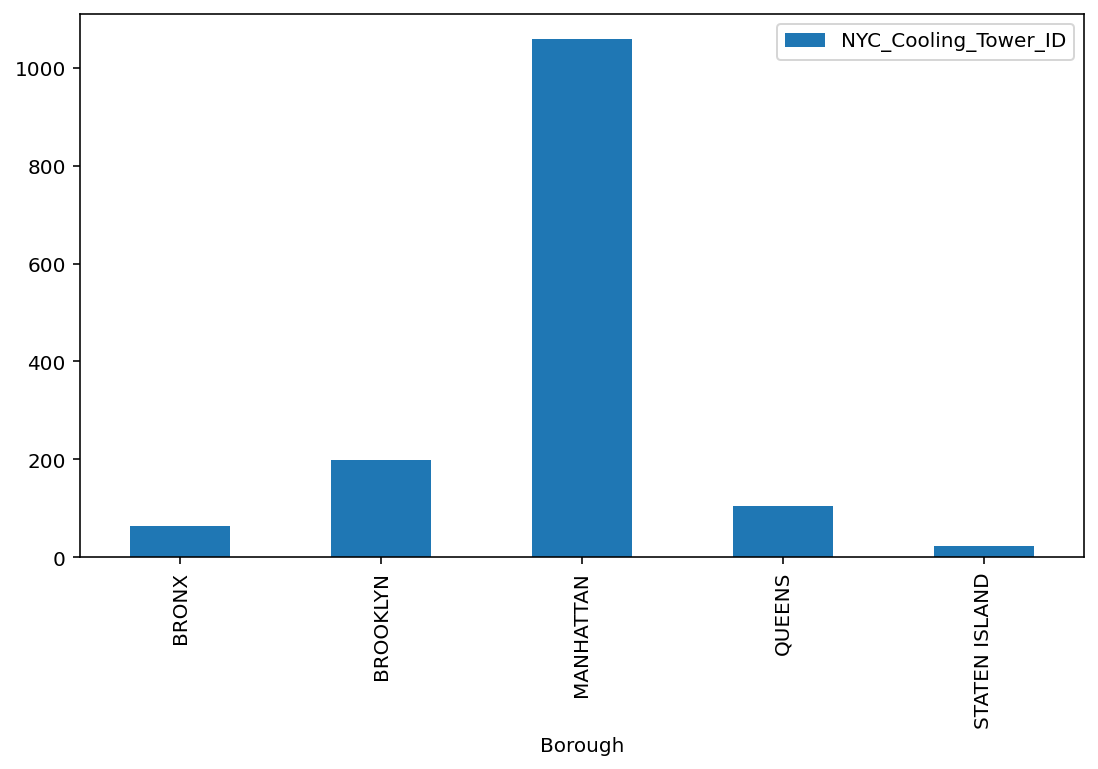

In [47]:
borough.plot.bar(figsize=(9,5))

Q.N.8
Plotting the NYC map using foliuma and displaying the all the infomration of cooling towers using marker.

In [48]:
## importing required library for map
import folium

In [49]:
map=folium.Map(width=1500,height=1000,location=[dff["Latitude"].mean(),
                         dff["Longitude"].mean()],
               zoom_start=13, control_scale=True)

In [50]:
for index, location_info in dff.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup="Address: "+location_info["Address"]+"\nMOdel: "+location_info["Model"]+"\nMake: "+
                  location_info["Make"]+"\n"+"\nS.N: "+location_info["Serial_Number"]+"\n"+"\nC.capacity: "+location_info["Cooling_Capacity"]+"\n"+"C.C.units: "
                  +location_info["Cooling_Capacity_Units"]+"\n"+"\t\n"+"\nIntended Use: "+location_info["Intended_Use"]).add_to(map)

In [51]:
map

In [52]:
#########################################THE END########################################